# Example of data whitening

Data whitening (aka the whitening or the sphering transformations) is a linear transformation based on principal 
component analysis (PCA). It transforms correlated multidimensional data into uncorrelated data with unit variance 
along each direction. The transformation is called "whitening" because it changes the input vector into a white noise vector.


## The PCA transformation
This linear transformation allows us to move from the natural/original space $\cal{X}$ into the component space $\cal{Z}$ and is defined as 
<blockquote>  $\bf{z} = \bf{W}^{T}(\bf{x}-\bf{\mu})$</blockquote>

with 
<blockquote> 
$\begin{align}
\bf{x} &= [x_{1} x_{2} \cdots  x_{N}]^\top \\
\bf{\mu} &= [\mu_{1} \mu_{2} \cdots \mu_{N}]^\top  \\
\bf{z} &= [z_{1} z_{2} \cdots z_{N}]^\top  \\
\end{align}$
</blockquote>

where N is the dimension of space and $\bf{\mu}$ is the mean of the N-dimensional data X. 

The $W$ matrix is made of the N eigenvectors $\bf{w}_{i}$ of the covariance matrix $\Sigma$. They are stacked together along columns

<blockquote>  
$\begin{align}
\bf{W} &= \begin{pmatrix} \bf{w}_{1} & \bf{w}_{2} & \dotsb & \bf{w}_{N}  \end{pmatrix} \\
&= \begin{pmatrix} w_{1,1} & w_{2,1} & \dotsb & w_{N,1} \\
w_{1,2} & w_{2,2} & \dotsb & w_{N,2} \\
\vdots &  \vdots & \dotsb & \vdots \\
w_{1,N} & w_{2,N} & \dotsb & w_{N,N} \end{pmatrix} 
\end{align}$                
</blockquote>

As for the covariance matrix $\Sigma$, it is computed from the N-dimensional data distribution of $\bf{x}$ 

<blockquote>  
$
\begin{align}
\bf{\Sigma} &= E\{(\bf{x}-\bf{\mu})(\bf{x}-\bf{\mu})^{T} \} \\
&= \begin{pmatrix} \sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,N} \\ 
\sigma_{1,2} & \sigma_{2}^2 & \cdots & \sigma_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{1,N} & \sigma_{2,N} & \cdots & \sigma_{N}^2 \end{pmatrix}
\end{align}
$                
</blockquote>

The principal components $\bf{z}$ are sorted in decreasing order of variance $var(z_{i})=\lambda_{i}$ where the $\lambda_{i}$ are 
the eigenvalues of the covariance matrix $\bf{\Sigma}$.

## Data whitening transformation

The data whitening transformation is defined as

<blockquote>  
$
\begin{align}
\bf{z}_{w} &= \bf{\Sigma}^{-0.5}(\bf{x}-\bf{\mu}) \\
       &= \bf{W} \bf{D}^{-0.5} \bf{W}^{T}(\bf{x}-\bf{\mu})
\end{align}
$                
</blockquote>


with the diagonal normalisation matrix 

<blockquote>  
$
\begin{align}
\bf{D}^{-0.5} &= \begin{pmatrix} \lambda_{1}^{-0.5} & 0 & \dotsb & 0  \\
0 & \lambda_{2}^{-0.5} & \dotsb & 0  \\
\vdots &  \vdots & \ddots & \vdots \\
0 & 0 & \dotsb & \lambda_{N}^{-0.5} \end{pmatrix} 
\end{align}
$                
</blockquote>

## Data whitening in simple steps

The data whitening transformation can be decomposed into a series of successive transformations:

<blockquote>  
Data centering 
<blockquote>  
$\bf{x}_{c} = \bf{x}-\bf{\mu}$
</blockquote>

PCA transformation: alignment of the data distribution along its principal axes (defined by the eigenvectors $\bf{w}_{1}$ and $\bf{w}_{2}$) 
<blockquote>
$\bf{z} = \bf{W}^{T} \bf{x}_{c}$
</blockquote>

Normalisation of the principal components
<blockquote>
$\bf{z}_{n} = \bf{D}^{-0.5} \bf{z}$
</blockquote>

Realignment of the data distribution along the original axes 
<blockquote>
$\bf{z}_{w} = \bf{W} \bf{z}_{n}$
</blockquote>
</blockquote>  


In order to avoid numerical instabilities, the data are usually normalised individually $\bf{x} \Longrightarrow \bf{x}_{n}$

<blockquote>
$x_{n,i} = \frac{x_{i}-\mu_{i}}{\sigma_{i}}$
</blockquote>

The last series of transforms simplifies to

<blockquote>  
$
\begin{align}
\bf{z} & = \bf{W}^{T} \bf{x}_{n} \\
\bf{z}_{n} &= \bf{D}^{-0.5} \bf{z} \\
\bf{z}_{w} &= \bf{W} \bf{z}_{n}
\end{align}
$                
</blockquote> 



In this script, we will show a detailed example of 2-D data whitening by separating the 
transformation into a series of simpler transformations. This is a visual approach to data exploration and processing.



In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
sns.set()

cm_bright = ListedColormap(['#FF0000', '#FFFF00'])

# Used for reproductibility of the results
np.random.seed(42)

Automatically created module for IPython interactive environment


# A few useful functions

Let us first define the printing functions for displaying scatterplots and printing statistics.

In [2]:
def display_data_points(X, text, figName=None, ax=None):
    
    if (ax is None):
        fig = plt.figure(figsize = (10, 10))
        ax = plt.gca()
        
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cm_bright, edgecolors='k')
    major_ticks = np.arange(-2, 3, 2)
    minor_ticks = np.arange(-2, 3, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    ax.grid(which='both')
    ax.grid(which='minor', linestyle='-.')
    ax.grid(which='major', linestyle='-', linewidth=2)
    
    ax.set_xlabel(text[0], fontsize=16)
    ax.set_ylabel(text[1], fontsize=16, rotation=0)
    ax.set_title(text[2], fontsize=18)
    
    if (figName is not None):
        plt.savefig(figName + '.png')
        plt.savefig(figName + '.pdf')

In [3]:
def print_stats(X):
    mu = X.mean(axis=0)
    covMatrix = np.cov(X.T,bias=True)

    print('Mean : ')
    print(np.round(mu,2))

    print('\nCovariance matrix : ')
    print(np.round(covMatrix,2))

# Generate the dataset

In [4]:
npts = 500
X,y = datasets.make_moons(n_samples=npts, noise=.15)


Show the original data and print statistics.

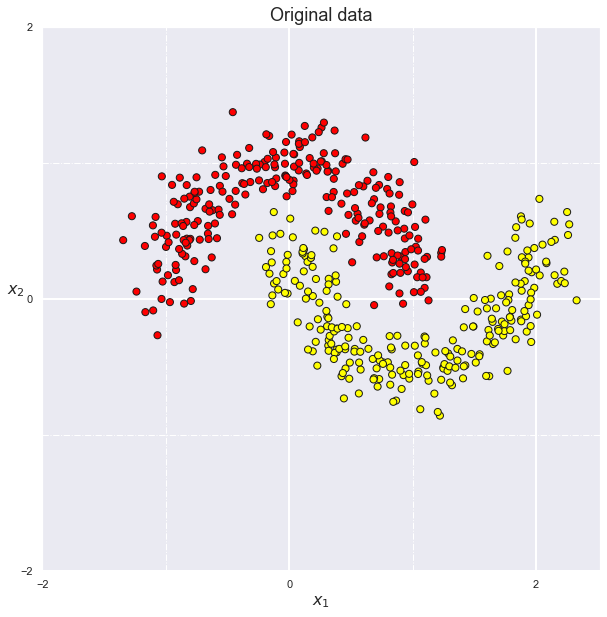

In [5]:
text = ['$x_{1}$', '$x_{2}$', 'Original data']
figName = '13.3.1_original_data'
display_data_points(X, text, figName=figName)

In [6]:
print_stats(X)

Mean : 
[0.51 0.25]

Covariance matrix : 
[[ 0.78 -0.19]
 [-0.19  0.27]]


The original data distribution is off centered, has different variances $\sigma_{1}^2$ and $\sigma_{2}^2$ and 
has a small covariance  $\sigma_{1,2}$. The $x_{1}$ and $x_{2}$ features are thus correlated.

# Data normalisation

Let us normalise the data

<blockquote> 
$\begin{align}
\tilde{x}_{1} &= \frac{x_{1}-\mu_{1}}{\sigma_{1}} \\
\tilde{x}_{2} &= \frac{x_{2}-\mu_{2}}{\sigma_{2}} 
\end{align}$
</blockquote>

In [7]:
X_n = StandardScaler().fit_transform(X)

Show the normalized X data and print statistics

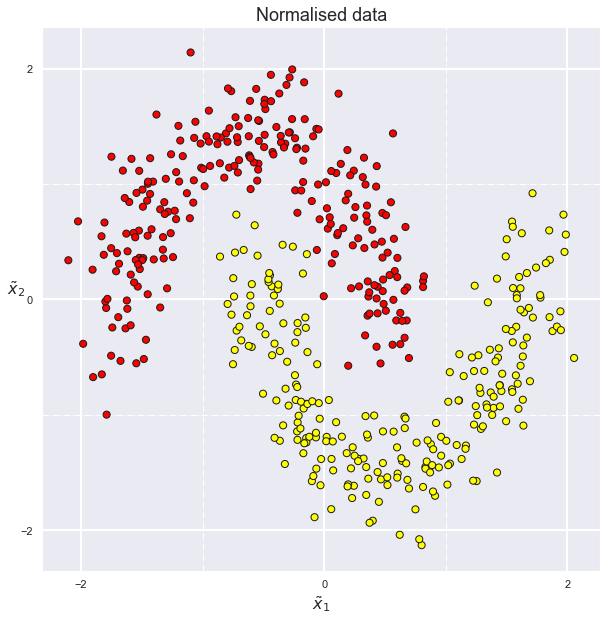

In [8]:
text = ['$\~{x}_{1}$', '$\~{x}_{2}$', 'Normalised data']
figName = '13.3.2_normalised_data'
display_data_points(X_n, text, figName=figName)

In [9]:
print_stats(X_n)

Mean : 
[ 0. -0.]

Covariance matrix : 
[[ 1.   -0.42]
 [-0.42  1.  ]]


The normalised data is now centered and has unit variances $\sigma_{1}^2$ and $\sigma_{2}^2$ but still has 
a slight covariance $\sigma_{1,2}$. The normalised features $\tilde{x}_{1}$ and $\tilde{x}_{2}$ remain correlated.

# Compute the principal components


In [10]:
pca = PCA()
Z = pca.fit_transform(X_n)


Compare the normalised data (with overlaid principal axes) with the principal components and print statistics.

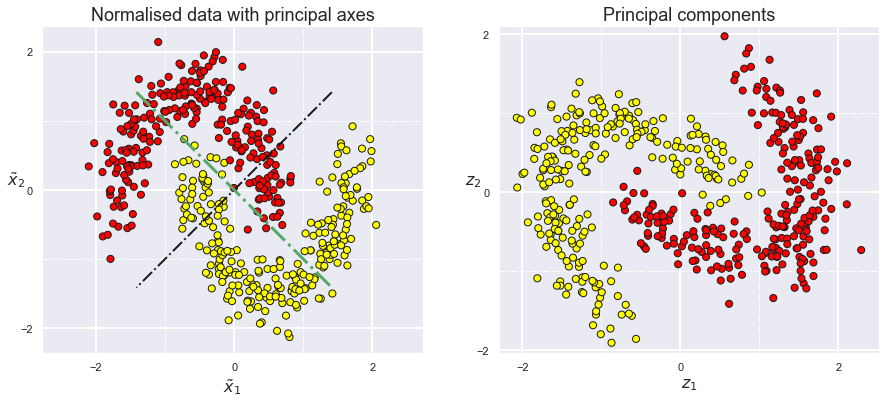

In [11]:
# Principal axes directions
w1 = pca.components_[:,0]
w2 = pca.components_[:,1]

t=np.linspace(-2,2)

fig, ax = plt.subplots(1,2,figsize = (15, 6))

text = ['$\~{x}_{1}$', '$\~{x}_{2}$', 'Normalised data with principal axes']
display_data_points(X_n, text, ax=ax[0])
ax[0].plot(w1[0]*t, w1[1]*t,color='k',linestyle='-.', linewidth=2)
ax[0].plot(w2[0]*t, w2[1]*t,color='g',linestyle='-.', linewidth=3)
ax[0].set_xlim([-2.5, 2.5]);
ax[0].set_ylim([-2.5, 2.5]);
ax[0].axis('equal');


text = ['${z}_{1}$', '${z}_{2}$', 'Principal components']
display_data_points(Z, text, ax=ax[1])
ax[1].set_xlim([-2.5, 2.5]);
ax[1].set_ylim([-2.5, 2.5]);
ax[1].axis('equal');

plt.savefig('13.3.3_principal_components.png')
plt.savefig('13.3.3_principal_components.pdf')

In [12]:
print_stats(Z)

Mean : 
[0. 0.]

Covariance matrix : 
[[ 1.42 -0.  ]
 [-0.    0.58]]


The principal components are centered, have different variances $\sigma_{1}^2$ and $\sigma_{2}^2$, and no covariance 
$\sigma_{1,2}$. They are uncorrelated as expected.

# Normalise the principal components


In [13]:
Z_n = StandardScaler().fit_transform(Z)

Show the normalised principal components and print statistics

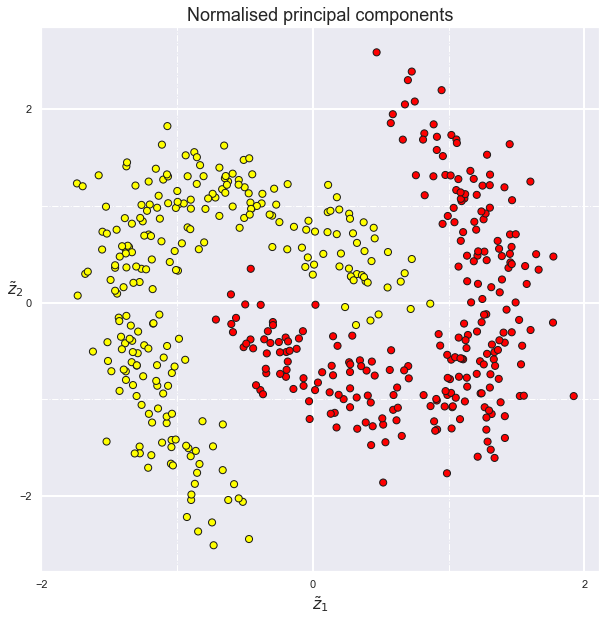

In [14]:
text = ['$\~{z}_{1}$', '$\~{z}_{2}$', 'Normalised principal components']
figName = '13.3.4_normalised_principal_components'
display_data_points(Z_n, text, figName=figName)

In [15]:
print_stats(Z_n)

Mean : 
[0. 0.]

Covariance matrix : 
[[ 1. -0.]
 [-0.  1.]]


The normalised principal components are centered, have unit variances $\sigma_{1}^2$ and $\sigma_{2}^2$, and no covariance 
$\sigma_{1,2}$. They are uncorrelated as expected.

# Apply the inverse PCA transform to obtain the whitened data


In [16]:
Z_w = pca.inverse_transform(Z_n)

Show the whitened data and print statistics

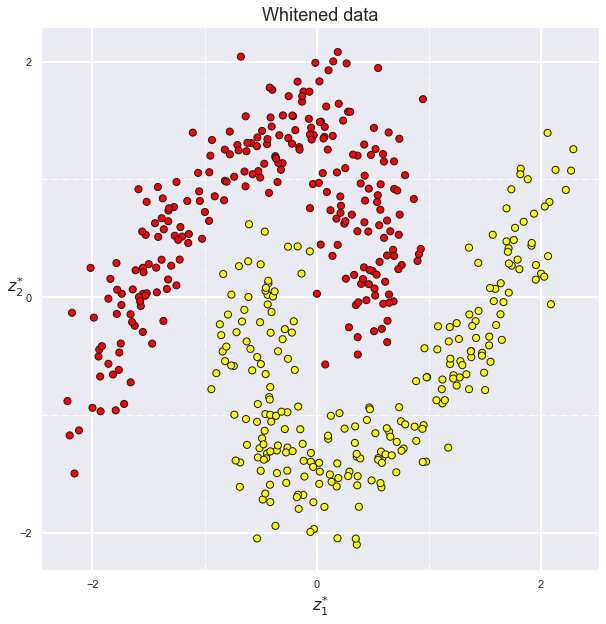

In [17]:
text = ['${z}_{1}^{*}$', '${z}_{2}^{*}$', 'Whitened data']
figName = '13.3.5_whitened_data'
display_data_points(Z_w, text, figName=figName)

In [18]:
print_stats(Z_w)

Mean : 
[ 0. -0.]

Covariance matrix : 
[[1. 0.]
 [0. 1.]]


The whitened data are centered, have unit variances $\sigma_{1}^2$ and $\sigma_{2}^2$, and are uncorrelated.

# Data whitening in a single step

Data whitening is so useful that it can be done alongside the PCA transform. 

In [19]:
pca = PCA(whiten=True)
Z_w2 = pca.fit_transform(X);

Show the whitened data and print statistics

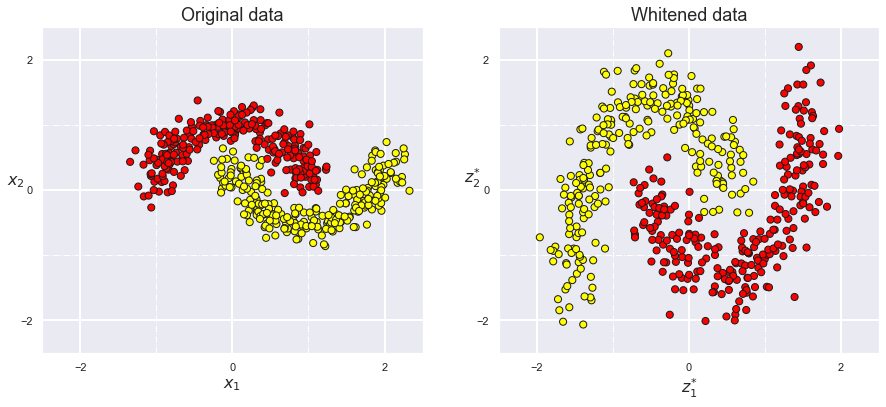

In [20]:
fig, ax = plt.subplots(1,2,figsize = (15, 6))

text = ['$x_{1}$', '$x_{2}$', 'Original data']
display_data_points(X, text, ax=ax[0])
ax[0].set_xlim([-2.5, 2.5])
ax[0].set_ylim([-2.5, 2.5])


text = ['${z}_{1}^{*}$', '${z}_{2}^{*}$', 'Whitened data']
display_data_points(Z_w2, text, ax=ax[1])
ax[1].set_xlim([-2.5, 2.5])
ax[1].set_ylim([-2.5, 2.5])

plt.savefig('13.3.6_data_whitening_comparison.png')
plt.savefig('13.3.6_data_whitening_comparison.pdf')

In [21]:
print_stats(Z_w2)

Mean : 
[-0.  0.]

Covariance matrix : 
[[ 1. -0.]
 [-0.  1.]]
